In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes= True)
%matplotlib inline 
 
df= pd.read_csv("master.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df  

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [3]:
m,n= df.shape
print("Number of records is %d"%m)
print("Number of variables is %d"%n)

Number of records is 27820
Number of variables is 12


In [4]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [5]:
for col in df.columns:
  list_unique= pd.unique(df[col])
  print(col+ " column is of type "+ str(df[col].dtype)+", has "+ str(len(list_unique))+ " unique values, and "+ str(np.sum(pd.isna(df[col])))+ " NULL entries")

  if len(list_unique)<10:
    list_str=""
    for val in range(len(list_unique)):
      list_str= list_str + str(list_unique[val]) + ", "
    print("  The unique values are: "+list_str[0:len(list_str)-2])


country column is of type object, has 101 unique values, and 0 NULL entries
year column is of type int64, has 32 unique values, and 0 NULL entries
sex column is of type object, has 2 unique values, and 0 NULL entries
  The unique values are: male, female
age column is of type object, has 6 unique values, and 0 NULL entries
  The unique values are: 15-24 years, 35-54 years, 75+ years, 25-34 years, 55-74 years, 5-14 years
suicides_no column is of type int64, has 2084 unique values, and 0 NULL entries
population column is of type int64, has 25564 unique values, and 0 NULL entries
suicides/100k pop column is of type float64, has 5298 unique values, and 0 NULL entries
country-year column is of type object, has 2321 unique values, and 0 NULL entries
HDI for year column is of type float64, has 306 unique values, and 19456 NULL entries
 gdp_for_year ($)  column is of type object, has 2321 unique values, and 0 NULL entries
gdp_per_capita ($) column is of type int64, has 2233 unique values, and 

**Variables and their Statistical Data Types**

1. country - Nominal
2. year -  Integer
3. sex - Nominal
4. age - Ordinal
5. suicides_no - Continuous
6. population - Continuous
7. suicides/100k pop - Continuous
8. country-year- Nominal
9. HDI for year - Continuous         
10. gdp_for_year - Continuous
11. gdp_per_capita ($) - Continuous  
12. generation -  Nominal     

In [6]:
for col in df.columns:
  list_unique= pd.unique(df[col])
  print(col+ " column has "+ str(np.sum(pd.isna(df[col])))+ " NULL entries")

country column has 0 NULL entries
year column has 0 NULL entries
sex column has 0 NULL entries
age column has 0 NULL entries
suicides_no column has 0 NULL entries
population column has 0 NULL entries
suicides/100k pop column has 0 NULL entries
country-year column has 0 NULL entries
HDI for year column has 19456 NULL entries
 gdp_for_year ($)  column has 0 NULL entries
gdp_per_capita ($) column has 0 NULL entries
generation column has 0 NULL entries


In [7]:
#To calculate number of rows with NON NULL VALUES
# df.count(axis=1) gets the number of non null values in each row
#Can be done by np.sum(df.count(axis=1)==len(df.columns))
print("The number of rows with NO Variable MISSING = %d"%(np.sum(df.count(axis=1)== len(df.columns))))

The number of rows with NO Variable MISSING = 8364


In [8]:
for col in df.columns:
  print(col, len(col))

country 7
year 4
sex 3
age 3
suicides_no 11
population 10
suicides/100k pop 17
country-year 12
HDI for year 12
 gdp_for_year ($)  18
gdp_per_capita ($) 18
generation 10


#**Converting Data Type of GDP Colum**
####The GDP column has values stored as **string** even though its a **continuous** variable, so we need to **typecast it into a numeric** type.

In [9]:
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.replace(',', '').astype(float)

In [10]:
#df1= list(df[" gdp_for_year ($) "])
#for i in range(0,m):
 # df1[i]= pd.to_numeric(str(df.iloc[i][" gdp_for_year ($) "]).replace(',', ''))

In [11]:
#df[" gdp_for_year ($) "]= pd.Series(df1)

###**So! As you can see below, I've successfully converted the gdp_for_year ($) column into an integer type!**

In [12]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2.156625e+09,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,6.306708e+10,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,6.306708e+10,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,6.306708e+10,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,6.306708e+10,2309,Generation Z


In [13]:
#This is just for assurance that I did not lose any other df while converting it to float64 type

"""
for col in df.columns:
  list_unique= pd.unique(df[col])
  print(col+ " column has "+ str(np.sum(pd.isna(df[col])))+ " NULL entries")
  """

'\nfor col in df.columns:\n  list_unique= pd.unique(df[col])\n  print(col+ " column has "+ str(np.sum(pd.isna(df[col])))+ " NULL entries")\n  '

In [14]:
df.rename(columns={" gdp_for_year ($) ": "gdp_for_year", "gdp_per_capita ($)":"gdp_per_capita"}, inplace= True)

In [15]:
df[["suicides_no", "population", "gdp_per_capita"]]= df[["suicides_no", "population", "gdp_per_capita"]].astype(float)

In [16]:
df.dtypes

country               object
year                   int64
sex                   object
age                   object
suicides_no          float64
population           float64
suicides/100k pop    float64
country-year          object
HDI for year         float64
gdp_for_year         float64
gdp_per_capita       float64
generation            object
dtype: object

#**Q1) b) i) Plotting the Discrete Columns**

---


#### I've used **logarithmic scale** below so that the df better fits the histogram as all of them had a really high value
**Not** plotting **country-year** because the column is essentially useless and doesn't really give us any other useful information its basically an amalgamation of the columns **country** and **year**


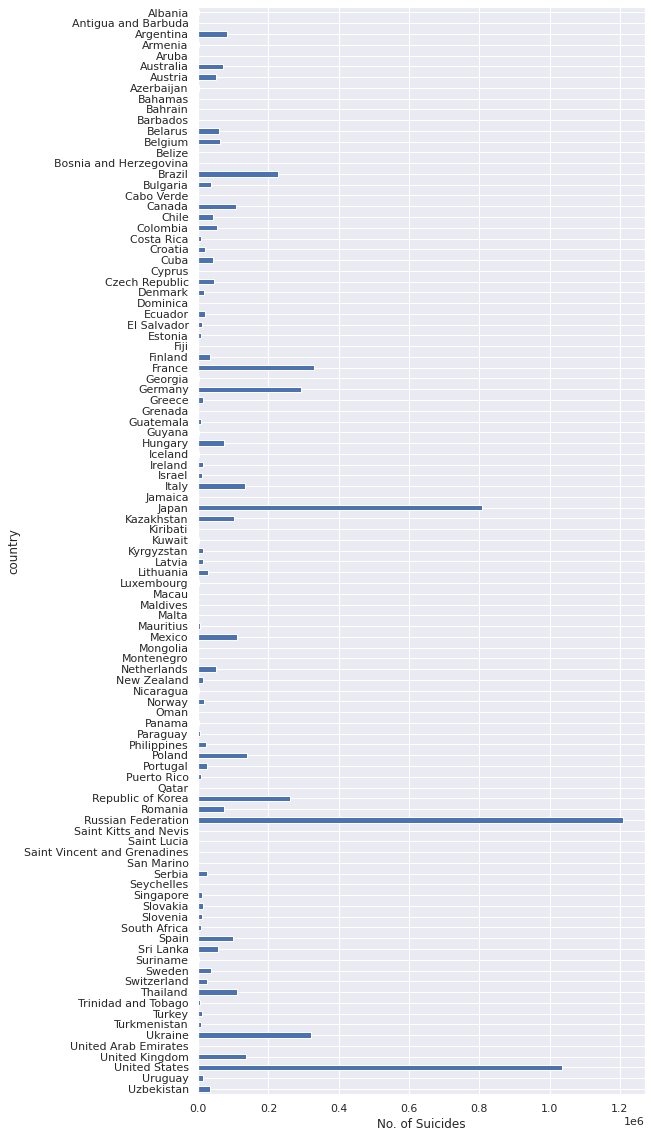

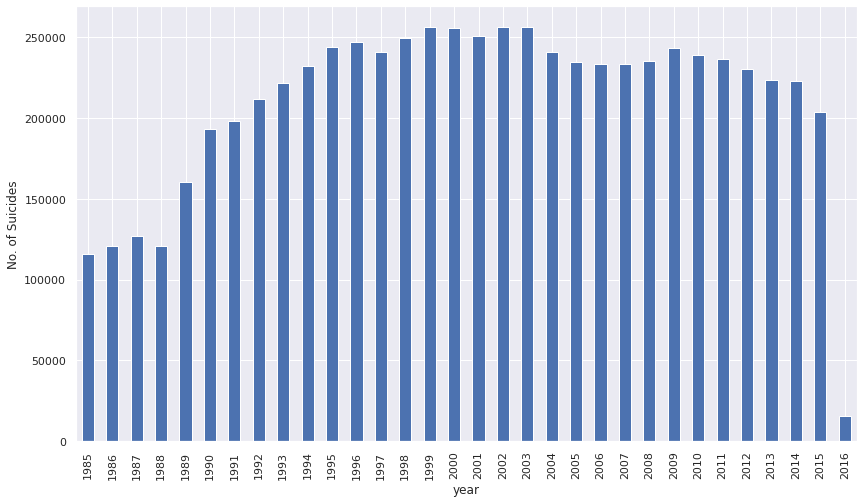

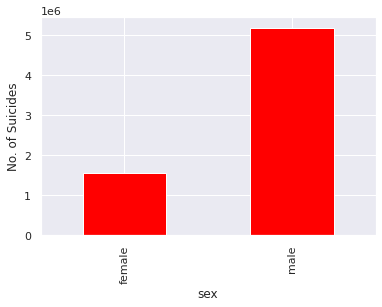

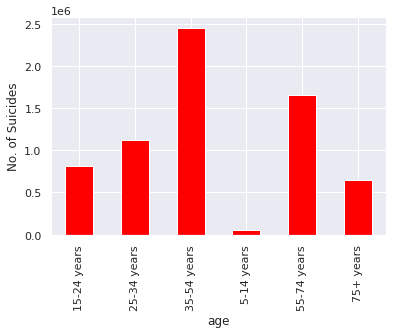

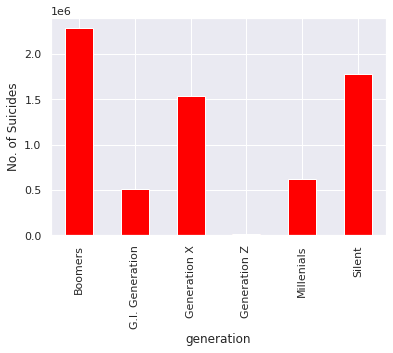

In [17]:
#Plotting the discrete INTEGER Variables
for col in df.columns:
    if(col!="country-year")&((df[col].dtype == "int64")|(df[col].dtype == "object")): 
        if(col=="country"):
            plt.figure(figsize=(8,20))
            df.groupby(col)["suicides_no"].sum().plot.barh(zorder=2).invert_yaxis()
            plt.xlabel("No. of Suicides")
            plt.show();
        
        elif(col=="year"):
            plt.figure(figsize=(14,8))
            df.groupby(col)["suicides_no"].sum().plot.bar(zorder=2)
            plt.ylabel("No. of Suicides")
            plt.show();

        else:
            df.groupby(col)["suicides_no"].sum().plot.bar(zorder=2, color="red")
            plt.ylabel("No. of Suicides")
            plt.show();



In [18]:
"""
#ALSO! PLEASE NOTE! For the variable, country-year, the Barplot is actually in white for some reason I don't know, look closely

for col in df.columns:
  if (df[col].dtype == "object")&(col!="country-year"):
    sns.barplot(df[col].unique(), df[col].value_counts(), color="red");      
    plt.xlabel(col);    
    plt.xticks(rotation=90);  
    plt.show();
  
  #Doing Country-Year column separately because the BarPlot loses its colour when i plot this column.
  elif (col=="country-year"):
    plt.hist(df[col].unique(), color="red")
    plt.xticks(rotation=90);
    plt.show();
    """

'\n#ALSO! PLEASE NOTE! For the variable, country-year, the Barplot is actually in white for some reason I don\'t know, look closely\n\nfor col in df.columns:\n  if (df[col].dtype == "object")&(col!="country-year"):\n    sns.barplot(df[col].unique(), df[col].value_counts(), color="red");      \n    plt.xlabel(col);    \n    plt.xticks(rotation=90);  \n    plt.show();\n  \n  #Doing Country-Year column separately because the BarPlot loses its colour when i plot this column.\n  elif (col=="country-year"):\n    plt.hist(df[col].unique(), color="red")\n    plt.xticks(rotation=90);\n    plt.show();\n    '

#**Q1)b)ii) Mode of the Discrete Variables**
Basically need to find out which Category of Each Variable has the most suicides

In [19]:
for col in df.columns:
  if (df[col].dtype=="int64")|(df[col].dtype=="object"):
    print("Mode of '"+col+"' :")
    
    #Argmax finds its maximum value and returns its index
    index_of_mode= np.argmax( df.groupby(col)["suicides_no"].sum())
    
    #using that index value to find the index label of the category corresponding to it
    print(df.groupby(col)["suicides_no"].sum().index[index_of_mode])
    print("No. of suicides= %d"%np.max(df.groupby(col)["suicides_no"].sum()))
    print("\n")

Mode of 'country' :
Russian Federation
No. of suicides= 1209742


Mode of 'year' :
1999
No. of suicides= 256119


Mode of 'sex' :
male
No. of suicides= 5188910


Mode of 'age' :
35-54 years
No. of suicides= 2452141


Mode of 'country-year' :
Russian Federation1994
No. of suicides= 61420


Mode of 'generation' :
Boomers
No. of suicides= 2284498




#**Q1)b)iii) Entropy of Discrete Variables**


In [20]:
#ENTER CODE FOR ENTROPY HERE!
for col in df.columns:
    if(df[col].dtype=="int64")|(df[col].dtype=="object"):
        frequency=df.groupby(col)["suicides_no"].sum()
        N= np.sum(frequency)
        entropy= - np.sum((frequency/N)*np.log(frequency/N))
        print(col+" Suicide Entropy: %f"%entropy+"\n")


country Suicide Entropy: 3.120361

year Suicide Entropy: 3.421145

sex Suicide Entropy: 0.540593

age Suicide Entropy: 1.529157

country-year Suicide Entropy: 6.443498

generation Suicide Entropy: 1.484428



/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#**Q1)c)i) Mean, Variance, Skew, Min, Max, Median, Q1, Q3, IQR of each Continuous Variable** 



In [21]:
for col in df.columns:
    #Q1, Q2, Q3= df[col].quantile([.25, .5, .75])
    if (df[col].dtype=="float64"):
        print("Variable: %s" %col)
        print(" 1. Mean= %f" %df[col].mean())
        print(" 2. Variance= %f" %df[col].var())
        print(" 3. Skew= %f" %df[col].skew())
        print(" 4. Min= %f" %df[col].min())
        print(" 5. Max= %f" %df[col].max())
        print(" 6. Median= %f" %df[col].median())
        print(" 7. Q1 (25th Percentile)= %f" %df[col].quantile(0.25))
        print(" 8. Q3 (75th percentile)= %f" %df[col].quantile(0.75))
        print(" 9. Inter Quartile Range= %f" %(df[col].quantile(0.75)-df[col].quantile(0.25))+"\n")

Variable: suicides_no
 1. Mean= 242.574407
 2. Variance= 813690.444264
 3. Skew= 10.352910
 4. Min= 0.000000
 5. Max= 22338.000000
 6. Median= 25.000000
 7. Q1 (25th Percentile)= 3.000000
 8. Q3 (75th percentile)= 131.000000
 9. Inter Quartile Range= 128.000000

Variable: population
 1. Mean= 1844793.617398
 2. Variance= 15302018400947.765625
 3. Skew= 4.459414
 4. Min= 278.000000
 5. Max= 43805214.000000
 6. Median= 430150.000000
 7. Q1 (25th Percentile)= 97498.500000
 8. Q3 (75th percentile)= 1486143.250000
 9. Inter Quartile Range= 1388644.750000

Variable: suicides/100k pop
 1. Mean= 12.816097
 2. Variance= 359.538900
 3. Skew= 2.963414
 4. Min= 0.000000
 5. Max= 224.970000
 6. Median= 5.990000
 7. Q1 (25th Percentile)= 0.920000
 8. Q3 (75th percentile)= 16.620000
 9. Inter Quartile Range= 15.700000

Variable: HDI for year
 1. Mean= 0.776601
 2. Variance= 0.008717
 3. Skew= -0.300877
 4. Min= 0.483000
 5. Max= 0.944000
 6. Median= 0.779000
 7. Q1 (25th Percentile)= 0.713000
 8. Q3 

#**Q1)c)ii) Box and Whisker Plots for Continuous Variable**

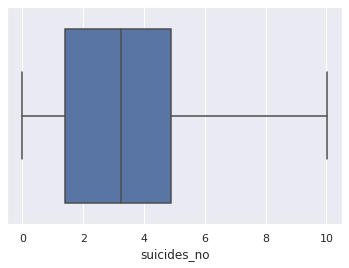

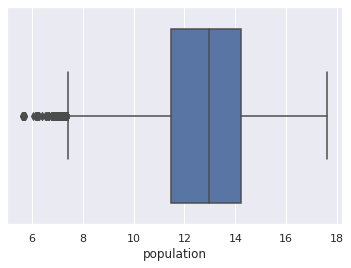

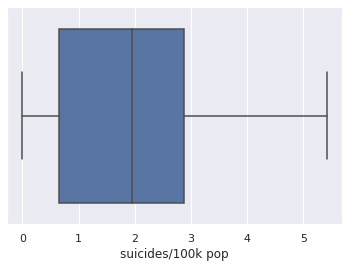

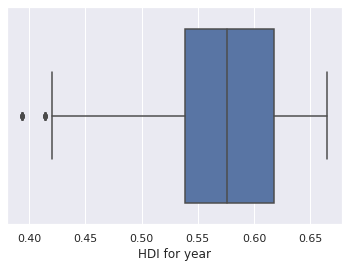

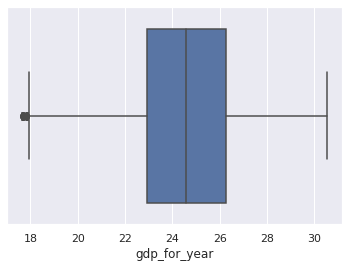

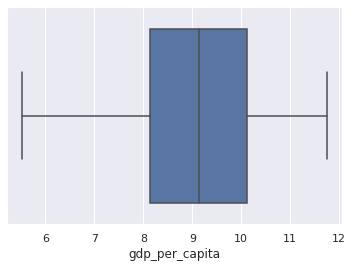

In [22]:
for col in df.columns:
    if df[col].dtype=="float64":
      sns.boxplot(np.log(1+df[col]))
      plt.show();

#**Q1)c)iii) Plotting Histogram 3 Times**
####Once with **very few** bins, once with **very large** no. of bins and once with **good amount** of bins.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


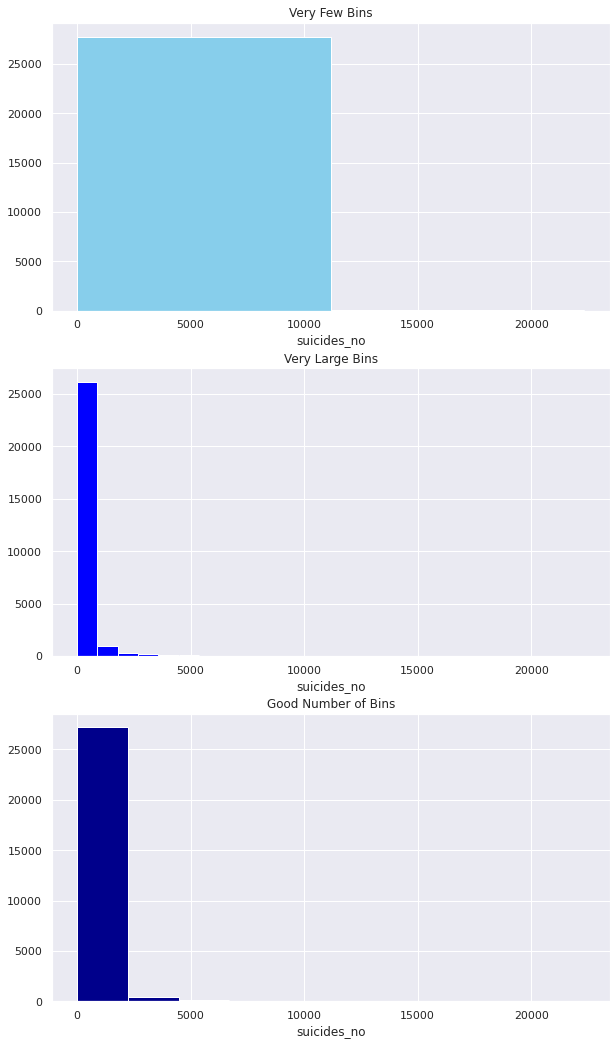

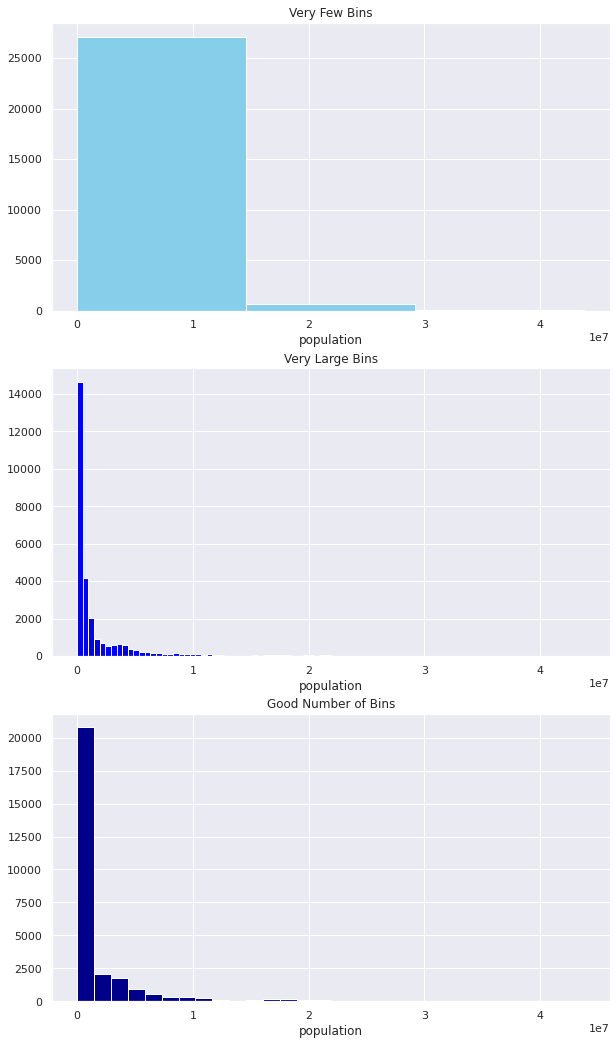

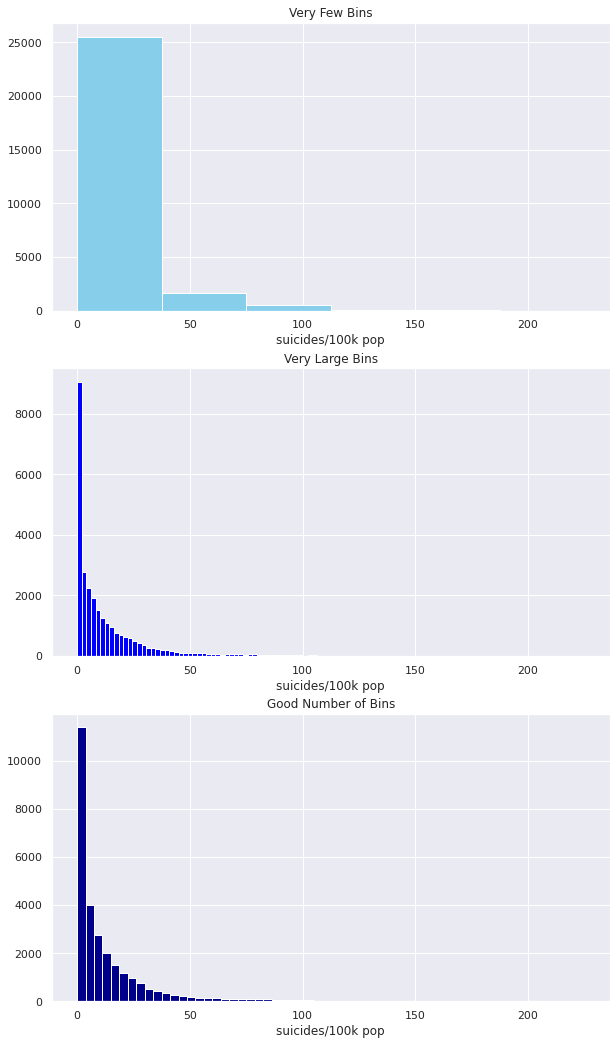

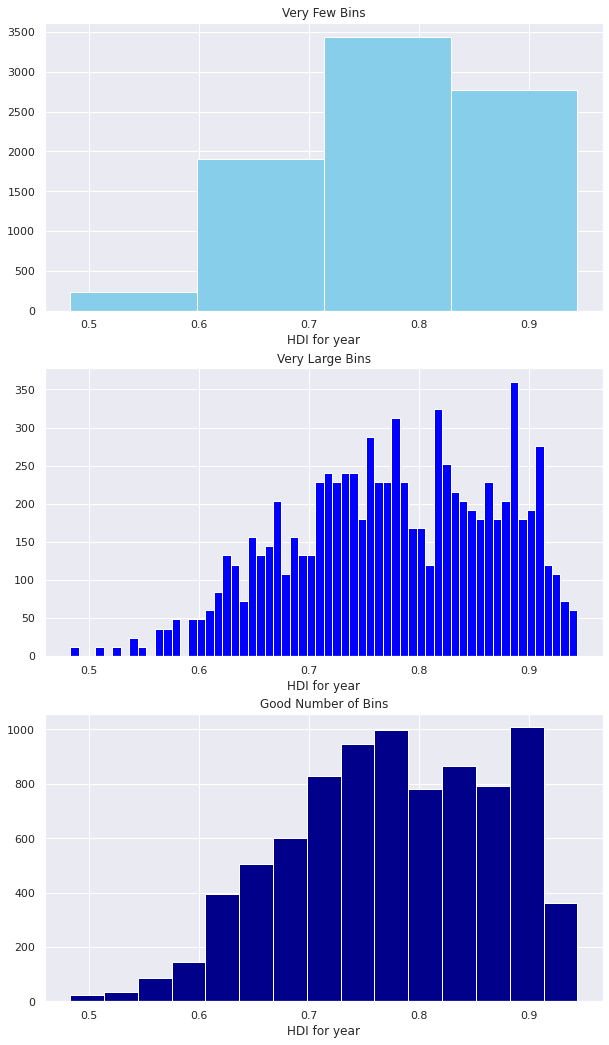

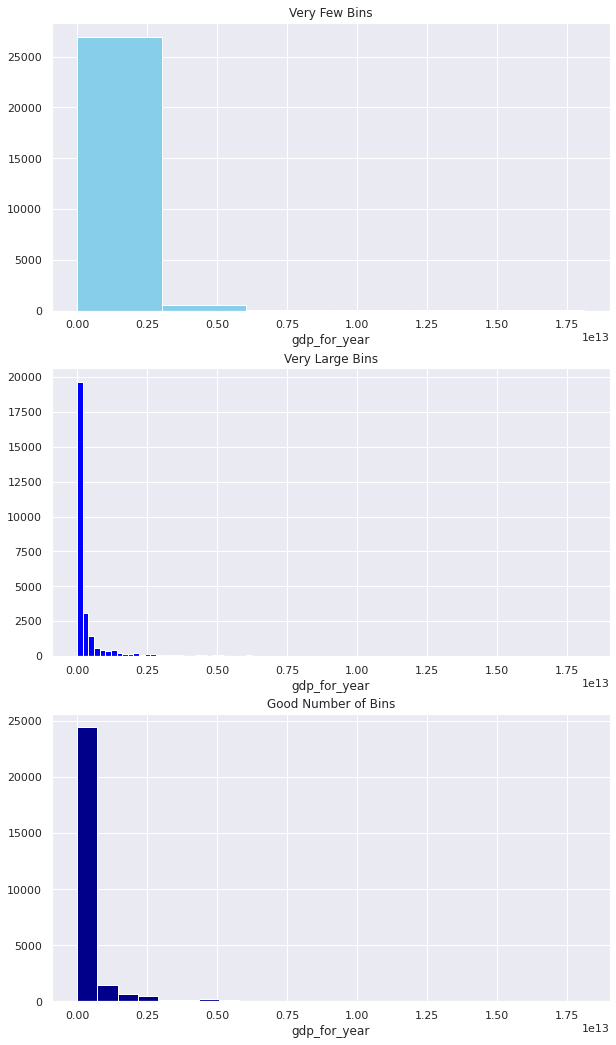

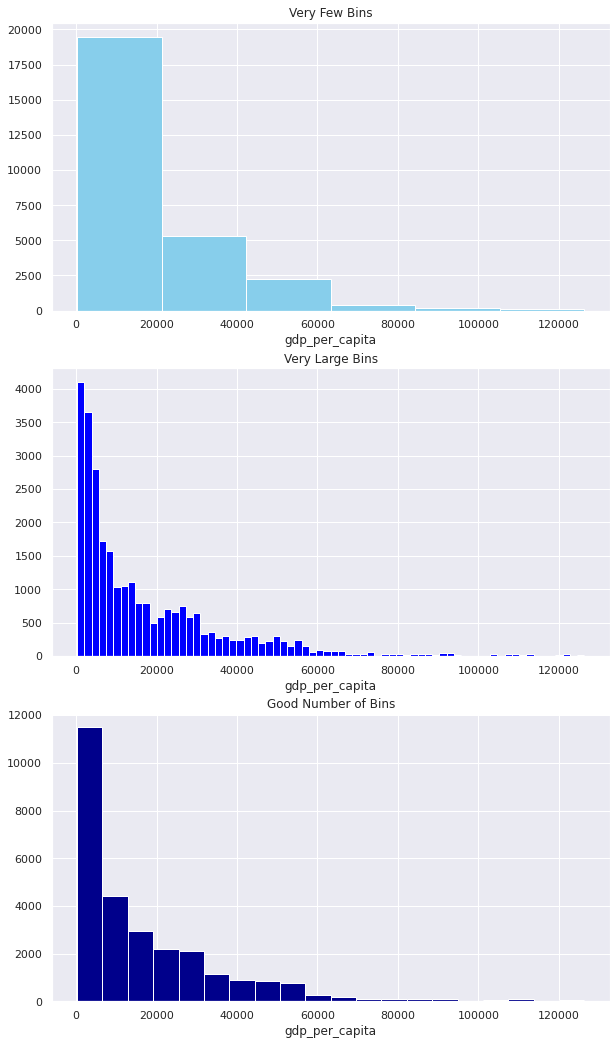

In [23]:
# col="suicides_no"
bin_list=[[2,25,10], [3,90,30 ], [6,110,60], [4,60,15], [6,90 ,25], [6,70,20]]
i=0
for col in df.columns:
    if (df[col].dtype=="float64"):
        fig, ax= plt.subplots(figsize=(10, 18),nrows=3,ncols=1)       
        
        #Subplot 1 with very few bins
        ax[0].hist(df[col], bins=bin_list[i][0], color="skyblue")
        ax[0].set_xlabel(col)
        ax[0].set_title("Very Few Bins")
      
        #Subplot 2 with very large bins
        ax[1].hist(df[col], bins=bin_list[i][1], color="blue")
        ax[1].set_xlabel(col)
        ax[1].set_title("Very Large Bins")
      
        #Subplot 3 with good amount of bins
        ax[2].hist(df[col], bins=bin_list[i][2], color="darkblue")
        ax[2].set_xlabel(col)
        ax[2].set_title("Good Number of Bins")
        i+=1
plt.show();

#**Q1)c)iv) Plotting QQ to find which variables deviate from normal**

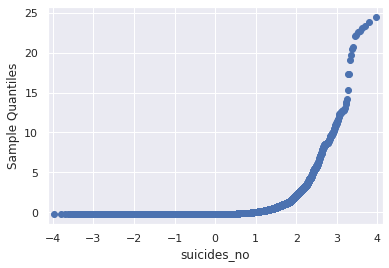

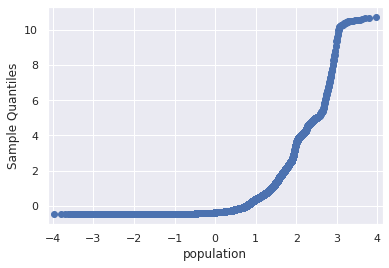

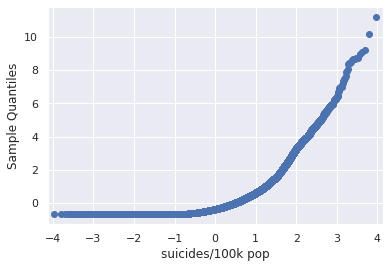

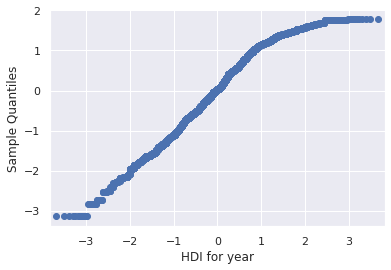

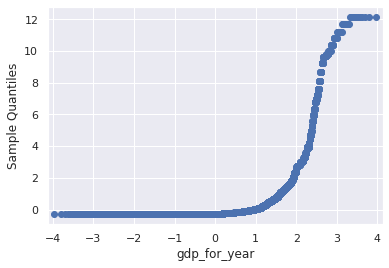

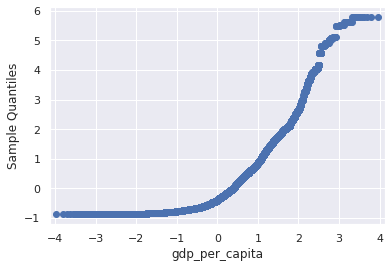

In [24]:
import statsmodels.api as sm
for col in df.columns:
    if (df[col].dtype=="float64"):
        fig = sm.qqplot(df[col].dropna(), fit= True)
        plt.xlabel(col);
plt.show()

#**Q1)c)v) Checking whether the variables are Log Normal or not**

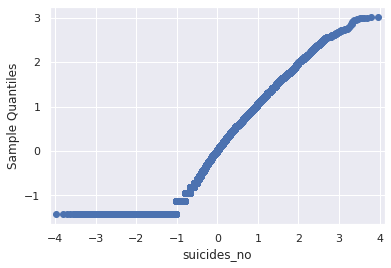

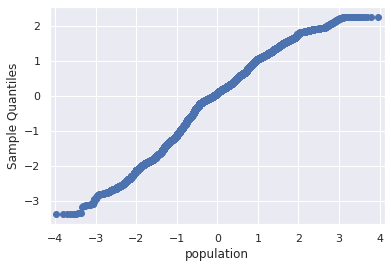

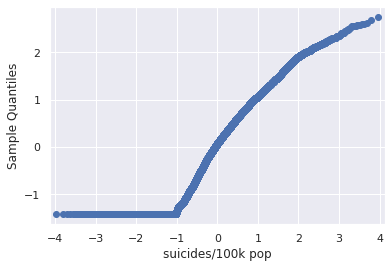

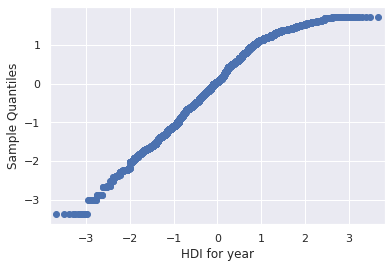

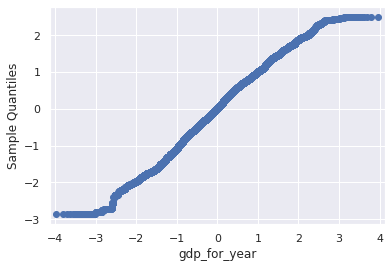

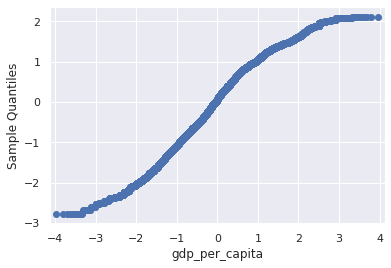

In [25]:
for col in df.columns:
    if (df[col].dtype=="float64"):
        fig = sm.qqplot(np.log(1+df[col].dropna()), fit=True)
        plt.xlabel(col);
plt.show()

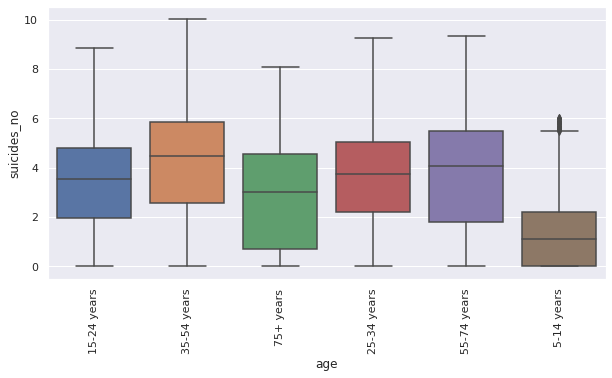

In [26]:
fig,ax= plt.subplots(figsize=(10,5),nrows=1,ncols=1)
sns.boxplot(df["age"], np.log(1+df["suicides_no"]))
plt.xticks(rotation=90)
plt.show();

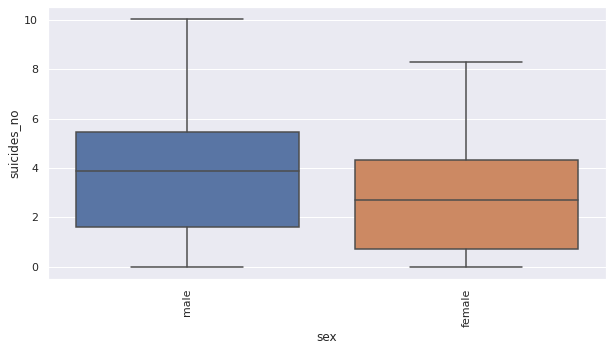

In [27]:
fig,ax= plt.subplots(figsize=(10,5),nrows=1,ncols=1)
sns.boxplot(df["sex"], np.log(1+df["suicides_no"]))
plt.xticks(rotation=90)
plt.show();

In [28]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

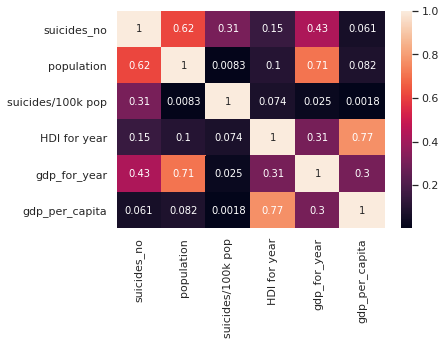

In [29]:
df2=df[['suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       'gdp_for_year', 'gdp_per_capita']]
sns.heatmap(df2.corr(), annot=True)
plt.show();

#**Q1)e) Other EDA Methods**

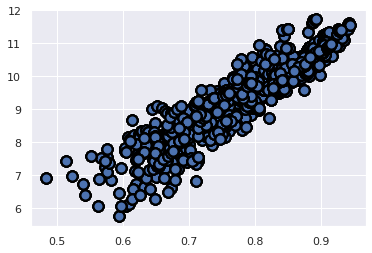

In [30]:
#Plotting a Scatter Plot
plt.plot(df["HDI for year"], np.log(df["gdp_per_capita"]),'o', mec= "black", mew=2, ms=10);
plt.show();

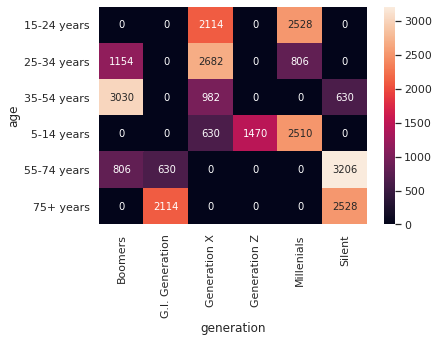

In [31]:
sns.heatmap(pd.crosstab(df["age"], df["generation"]), annot=True, fmt='d')